In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import scipy.io.wavfile as wavfile
import scipy.fftpack as fftpk
from matplotlib import pyplot as plt

import sounddevice as sd
import soundfile as sf
import librosa

from IPython.display import Image
import ipywidgets as widgets
from IPython.display import display

In [18]:
def trainingA():
    
    # Creating a Dataframe to store the results
    input_test = pd.DataFrame(np.zeros((2,8)))
    input_test.columns = ["RMS","Mean","MA1","MA2","MA3","F1","F2","F3"]

    # Training the data repeatively
    for i in range(100):
        
        # Recording the audio
        samplerate = 48000  
        duration = 5 # seconds
        audio = 'A_testing.wav'
        print("training data",i+1,"....")
        mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,channels=1, blocking=True)
        sd.wait()
        sf.write(audio, mydata, samplerate)
        
        # Reading the audio file
        s_rate, signal = wavfile.read(audio)
        
        # Extracting the features from time domain
        mean = abs(signal).mean()
        rms = np.sqrt(abs((signal**2).mean()))
        
        # Extracting the feaures from frequency domain with Fast Fourier Transform
        FFT_ = abs(fftpk.fft(signal))
        FFT = FFT_[range(len(FFT_)//2)]
        freqs = fftpk.fftfreq(len(FFT), 1.0/s_rate)[range(len(FFT_)//2)]
        
        # Extracting the 3 highest amplitudes in freqeuency spectrum 
        sorted = np.sort(FFT)[::-1]
        ma1, ma2 , ma3 = sorted[[0,1,2]]

        # Exrtacting the frequency positions of above amplitudes
        max_amp_index = [np.where(FFT == sorted[0])[0], np.where(FFT == sorted[1])[0], np.where(FFT == sorted[2])[0]]
        f1, f2, f3 = np.concatenate(freqs[max_amp_index])

        # Adding all the extracted features into the dataframe
        features = [rms,mean,ma1,ma2,ma3,f1,f2,f3]
        input_test.loc[i]= features
       
    print('Successfully trained')    
    return input_test

In [20]:
data = trainingA()
data

training data 1 ....
training data 2 ....
training data 3 ....
training data 4 ....
training data 5 ....
training data 6 ....
training data 7 ....
training data 8 ....
training data 9 ....
training data 10 ....
training data 11 ....
training data 12 ....
training data 13 ....
training data 14 ....
training data 15 ....
training data 16 ....
training data 17 ....
training data 18 ....
training data 19 ....
training data 20 ....
training data 21 ....
training data 22 ....
training data 23 ....
training data 24 ....
training data 25 ....
training data 26 ....
training data 27 ....
training data 28 ....
training data 29 ....
training data 30 ....
training data 31 ....
training data 32 ....
training data 33 ....
training data 34 ....
training data 35 ....
training data 36 ....
training data 37 ....
training data 38 ....
training data 39 ....
training data 40 ....
training data 41 ....
training data 42 ....
training data 43 ....
training data 44 ....
training data 45 ....
training data 46 ..

,RMS,Mean,MA1,MA2,MA3,F1,F2,F3
0,5.423419,7323.232142,1.081815e+08,9.190244e+07,6.921380e+07,4654.0,4653.6,3878.4
1,1.001915,7314.401050,1.079018e+08,7.385575e+07,6.750851e+07,4652.8,3877.2,4651.2
2,8.242958,7324.931708,1.074631e+08,7.865560e+07,7.158041e+07,4652.4,4652.8,4650.4
3,4.542539,7286.054538,9.487832e+07,7.856669e+07,7.847439e+07,4653.2,4654.4,3877.6
4,8.292086,7260.984592,8.300630e+07,7.242976e+07,6.484237e+07,4654.4,4652.0,4650.4
...,...,...,...,...,...,...,...,...
95,50.376463,245.696504,5.896716e+07,1.220753e+06,1.198320e+06,0.0,96.8,81.6
96,21.261715,264.961262,6.333030e+07,2.517597e+06,2.319303e+06,0.0,96.0,138.4
97,30.455252,254.501867,6.108045e+07,2.237370e+06,1.776318e+06,0.0,97.6,97.2
98,16.528549,295.864050,6.111672e+07,2.793194e+06,2.645970e+06,0.0,652.4,1148.8


In [21]:
data.to_csv("data/anomaly_detection_training.csv",index=False)
A_data = pd.read_csv("data/anomaly_detection_training.csv")
A_data 

,RMS,Mean,MA1,MA2,MA3,F1,F2,F3
0,5.423419,7323.232142,1.081815e+08,9.190244e+07,6.921380e+07,4654.0,4653.6,3878.4
1,1.001915,7314.401050,1.079018e+08,7.385575e+07,6.750851e+07,4652.8,3877.2,4651.2
2,8.242958,7324.931708,1.074631e+08,7.865560e+07,7.158041e+07,4652.4,4652.8,4650.4
3,4.542539,7286.054538,9.487832e+07,7.856669e+07,7.847439e+07,4653.2,4654.4,3877.6
4,8.292086,7260.984592,8.300630e+07,7.242976e+07,6.484237e+07,4654.4,4652.0,4650.4
...,...,...,...,...,...,...,...,...
95,50.376463,245.696504,5.896716e+07,1.220753e+06,1.198320e+06,0.0,96.8,81.6
96,21.261715,264.961262,6.333030e+07,2.517597e+06,2.319303e+06,0.0,96.0,138.4
97,30.455252,254.501867,6.108045e+07,2.237370e+06,1.776318e+06,0.0,97.6,97.2
98,16.528549,295.864050,6.111672e+07,2.793194e+06,2.645970e+06,0.0,652.4,1148.8


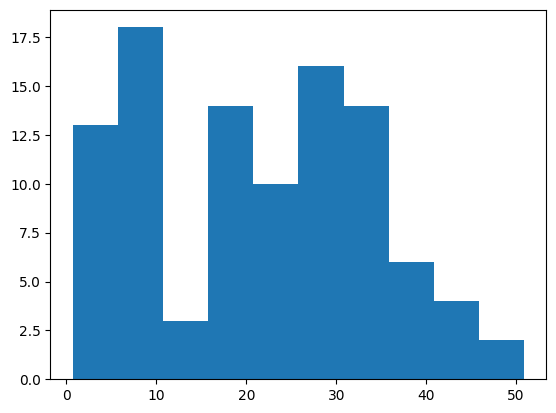

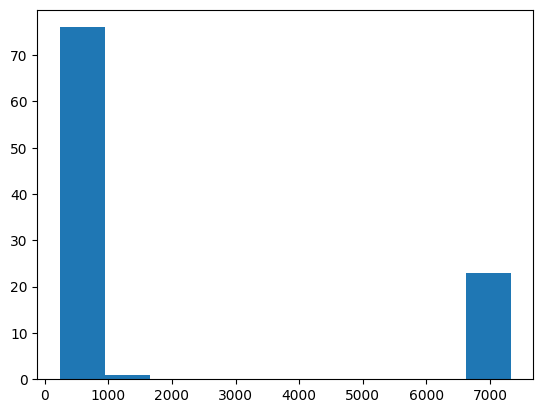

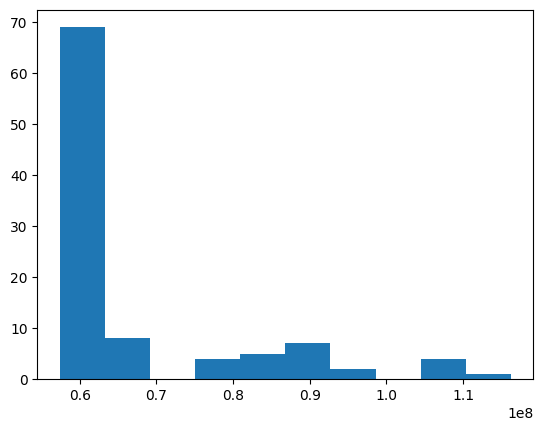

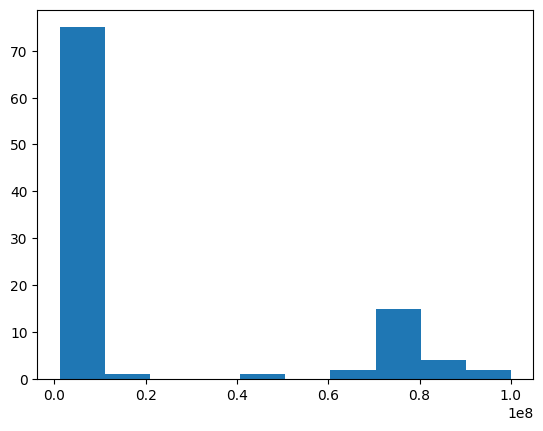

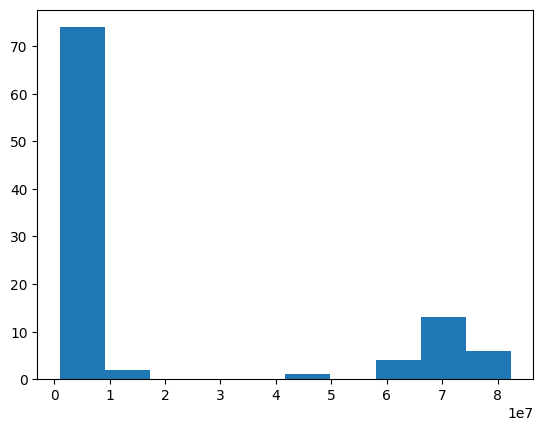

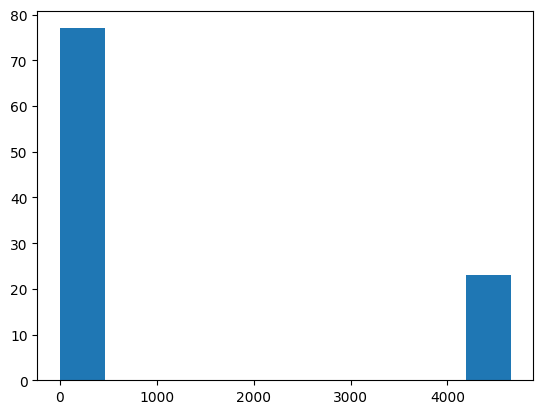

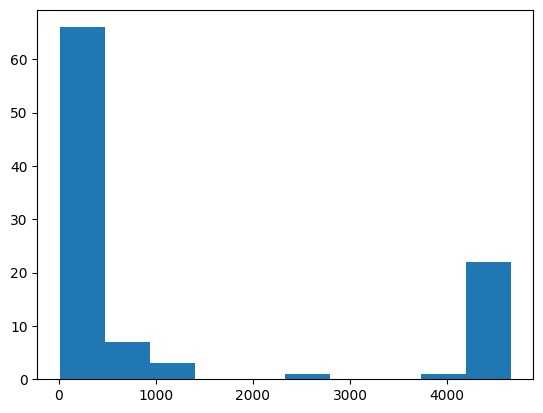

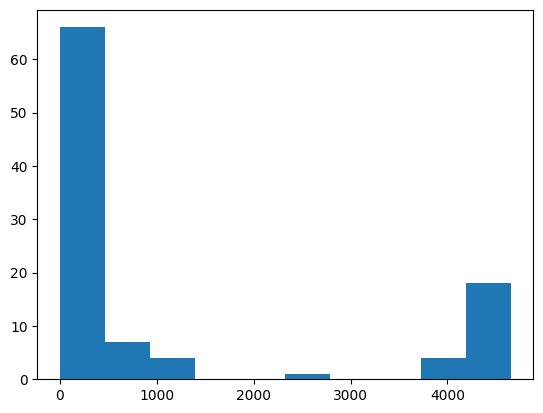

In [22]:
A_data = pd.read_csv("data/anomaly_detection_training.csv")
for i in range(8):
    plt.hist((A_data.iloc[:,i]),bins=10)
    plt.show()

In [25]:
# Estimating the gaussian parameters
def estimate_gaussian(X):
    
    m, n = X.shape # m = no: of data , # n = no: of features
    
    # Initializing mean and variance as zero
    mu =np.zeros(n,)    # mean
    var = np.zeros(n,)  # variance
    
    # Calculating the mean and variance for each feature
    for i in range(n):
        mu[i] = np.mean(X[:,i])
        var[i] = np.mean((X[:,i]-mu[i])**2)
            
    return mu, var
    
X = (A_data).to_numpy()
mu = estimate_gaussian(X)[0]
var = estimate_gaussian(X)[1]

In [50]:
def prob(mu,var,X):
    
    m, n = X.shape # m = no: of data , # n = no: of features
    
    p = np.zeros((m,n))
    
    
    # Calculating the mean and variance for each feature
    for i in range(n):    
        for j in range(m):
            x = X[[j],[i]]
            p[[j],[i]] = (np.exp(-((x-mu[i])**2)/(2*var[i])))/(np.sqrt(2*np.pi*var[i]))
            
    prob = (np.prod(p,axis=1))
    return prob



In [46]:
def predict(mu,var):
    # Recording the audio
    samplerate = 48000  
    duration = 5 # seconds
    audio = 'test1.wav'
    mydata = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1, blocking=True)
    sd.wait()
    sf.write(audio, mydata, samplerate)

    # Reading the audio
    s_rate, signal = wavfile.read(audio)

    # Extracting the features
    
    mean = abs(signal).mean()
    rms = np.sqrt(abs((signal**2).mean()))
    FFT_ = abs(fftpk.fft(signal))
    FFT = FFT_[range(len(FFT_)//2)]
    freqs = fftpk.fftfreq(len(FFT), 1.0/s_rate)[range(len(FFT_)//2)]
    sorted = np.sort(FFT)[::-1]
    ma1, ma2 , ma3 = sorted[[0,1,2]]
    max_amp_index = [np.where(FFT == sorted[0])[0], np.where(FFT == sorted[1])[0], np.where(FFT == sorted[2])[0]]
    f1, f2, f3 = np.concatenate(freqs[max_amp_index])

    features =np.array([[rms,mean,ma1,ma2,ma3,f1,f2,f3]])
     
    # Making the predictions
    prob_pred = prob(mu,var,features)

    epsilon = 1e-47
    if prob_pred >epsilon:
        print("\033[1mMachine ID: Healthy condition\033[0m")
        display(Image(filename="assets/images/good_.png", width=200))
    else:
        print("\033[1mMachine ID: Fault detected\033[0m")
        display(Image(filename="assets/images/mfault2.png", width=200))
   
    return prob_pred

Machine ID: Fault detected


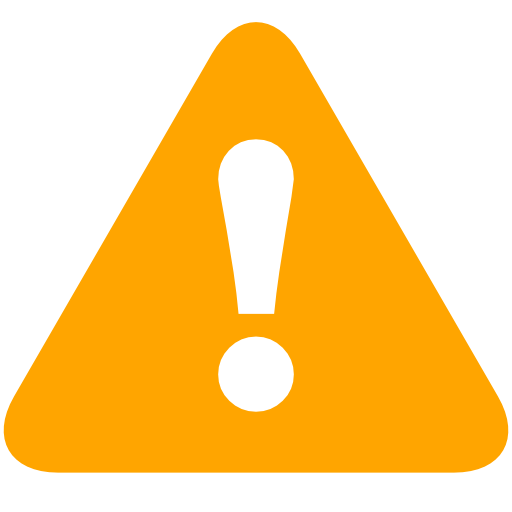

array([2.82967717e-52])

In [49]:
predict(mu,var)